In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Conv2D, MaxPool2D, BatchNormalization , Activation, ReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models, losses
import cv2
import numpy as np 

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.0 
x_test = x_test.astype('float32') / 255.0 

In [4]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
y_train.shape, x_train.shape

((50000, 10), (50000, 32, 32, 3))

In [6]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 10))

In [10]:
model = Sequential()
# model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]))
model.add(Conv2D(64, 3, strides= 1, padding='same', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(64, 3, strides= 1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPool2D((2,2), strides=2))

model.add(Conv2D(128, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(128, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPool2D((2, 2), strides=2))

model.add(Conv2D(256, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(256, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(256, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPool2D((2, 2), strides=2))

model.add(Conv2D(512, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(512, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(512, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPool2D((2, 2), strides=2))
model.add(MaxPool2D((2, 2), strides=2))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)       

In [12]:
model.compile(optimizer='adam', 
              loss=losses.categorical_crossentropy, 
              metrics=['accuracy'])

history = model.fit(x_train, y_train, 
                    batch_size=128, 
                    epochs=50, 
                    verbose=1, 
                    validation_data=(x_test, y_test))

Epoch 1/50
391/391 [==============================] - 58s 63ms/step - loss: 2.1135 - accuracy: 0.1955 - val_loss: 3.6786 - val_accuracy: 0.1315
Epoch 2/50
391/391 [==============================] - 23s 59ms/step - loss: 1.4972 - accuracy: 0.4174 - val_loss: 1.5311 - val_accuracy: 0.4501
Epoch 3/50
391/391 [==============================] - 23s 58ms/step - loss: 1.1445 - accuracy: 0.5954 - val_loss: 1.4737 - val_accuracy: 0.5003
Epoch 4/50
391/391 [==============================] - 23s 58ms/step - loss: 0.8979 - accuracy: 0.6959 - val_loss: 0.9763 - val_accuracy: 0.6657
Epoch 5/50
391/391 [==============================] - 23s 59ms/step - loss: 0.7513 - accuracy: 0.7505 - val_loss: 0.8476 - val_accuracy: 0.7129
Epoch 6/50
391/391 [==============================] - 23s 59ms/step - loss: 0.6343 - accuracy: 0.7951 - val_loss: 0.8384 - val_accuracy: 0.7248
Epoch 7/50
391/391 [==============================] - 23s 59ms/step - loss: 0.5499 - accuracy: 0.8227 - val_loss: 0.6776 - val_accuracy:

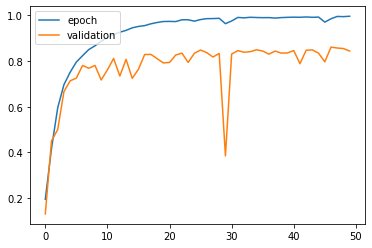

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['epoch', 'validation'], loc = 'upper left')
plt.show()

In [14]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
predictions = model.predict(x_test, verbose=1)

313/313 [==============================] - 3s 7ms/step - loss: 1.0362 - accuracy: 0.8430
Test loss: 1.0361520051956177
Test accuracy: 0.8429999947547913
313/313 [==============================] - 2s 5ms/step
